In [ ]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
sys.path.append('../models/research/object_detection')


In [ ]:
import tarfile
import tensorflow as tf
import zipfile
import cv2

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline  

from PIL import Image
from utils import label_map_util
from utils import visualization_utils as vis_util

In [3]:
%env PATH=/usr/local/cuda-10.0/bin${PATH:+:${PATH}}
%env LD_LIBRARY_PATH=/usr/local/cuda-10.0/lib64${LD_LIBRARY_PATH:+:${LD_LIBRARY_PATH}}
%env LD_LIBRARY_PATH=/usr/local/cuda-10.0/extras/CUPTI/lib64:$LD_LIBRARY_PATH

env: PATH=/usr/local/cuda-10.0/bin${PATH:+:${PATH}}
env: LD_LIBRARY_PATH=/usr/local/cuda-10.0/lib64${LD_LIBRARY_PATH:+:${LD_LIBRARY_PATH}}
env: LD_LIBRARY_PATH=/usr/local/cuda-10.0/extras/CUPTI/lib64:$LD_LIBRARY_PATH


In [4]:
# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = "./trained-inference-graphs/output_inference_graph_v1.pb/frozen_inference_graph.pb"
PATH_TO_LABELS = os.path.join('./label_map.pbtxt')
NUM_CLASSES = 120

In [5]:
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

In [6]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(
    label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


In [7]:
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

In [21]:
img.shape

(500, 800, 3)

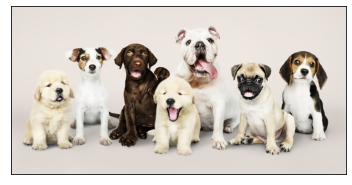

In [40]:
img=cv2.imread('20191023500731.jpg')
width, height,  channel = img.shape
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap="brg")
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
%matplotlib inline  

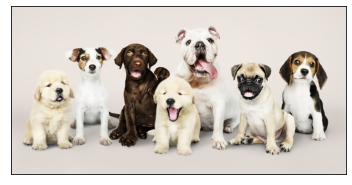

In [43]:
# Detection
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_np = img
        image_np_expanded = np.expand_dims(image_np, axis=0)
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        scores = detection_graph.get_tensor_by_name('detection_scores:0')
        classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name(
            'num_detections:0')

        # Actual detection.
        (boxes, scores, classes, num_detections) = sess.run(
            [boxes, scores, classes, num_detections],
            feed_dict={image_tensor: image_np_expanded})
        # Visualization of the results of a detection.
        vis_util.visualize_boxes_and_labels_on_image_array(
            image_np,
            np.squeeze(boxes),
            np.squeeze(classes).astype(np.int32),
            np.squeeze(scores),
            category_index,
            use_normalized_coordinates=True,
            line_thickness=8)

        # Display output
        plt.imshow(cv2.resize(cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB), (height, width )))
        plt.xticks([]), plt.yticks([]) 
        plt.show()

In [54]:
scores

array([[0.05636182, 0.04474968, 0.04019168, 0.03207198, 0.0319415 ,
        0.02782902, 0.02728751, 0.02534619, 0.0247854 , 0.02415442,
        0.0228672 , 0.0224728 , 0.02208668, 0.0217205 , 0.02159354,
        0.02134085, 0.02124992, 0.02111641, 0.02092028, 0.02034202,
        0.02033964, 0.02033946, 0.02020717, 0.01982415, 0.01962265,
        0.01940778, 0.01883754, 0.01863348, 0.01851955, 0.0179123 ,
        0.01773095, 0.01759717, 0.0170871 , 0.01702747, 0.01698083,
        0.01647046, 0.0162887 , 0.01624021, 0.01621002, 0.01618385,
        0.01614943, 0.01606503, 0.01602408, 0.0158985 , 0.01584011,
        0.01582578, 0.01571369, 0.01570284, 0.01567879, 0.01567018,
        0.01564884, 0.01563185, 0.01561075, 0.01560444, 0.01555797,
        0.01548079, 0.0153918 , 0.01526549, 0.01526508, 0.01518351,
        0.01504996, 0.01504192, 0.01494351, 0.01493576, 0.01490423,
        0.01485181, 0.01473084, 0.01460424, 0.01458111, 0.01441482,
        0.01434925, 0.01431468, 0.0142276 , 0.01